In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import fits

In [2]:
# opening each file

# AC film dark
#frame = fits.open('Background No Laser 2023 August 28 16_45_33.fits') # 100ms exposure after continuous data
#ac_filmdark_100ms = np.array(frame[0].data,dtype=np.float64)
frame1bg = fits.open('2024 April 29 17_16_39_lightsoff_background_1.fits')


ac_filmdark1_800ms = np.array(frame1bg[0].data,dtype=np.float64)

frame1bg.close


# AC film signal
frame1 = fits.open('2024 April 29 17_17_10_lightsoff_1.fits')



ac_filmsignal1= np.array(frame1[0].data,dtype=np.float64)

frame1.close


# bias frames
#frame = fits.open('220627_Kr_34K_bias_nofilm_wls_off.fits') # 1ms exposure bias frame
#bias_nofilm_1ms = np.array(frame[0].data,dtype=np.float64)
#frame.close

print("Shape of the arrays: {}".format(ac_filmsignal1.shape)) # checking the size of an array

Shape of the arrays: (1, 1024, 1024)


In [3]:
# reshaping the array by removing the "1" of a 3D array
#---------------------------------------------------------------------------------
# with film dark files 
ac_filmdark1_800ms = ac_filmdark1_800ms.reshape([1024,1024])


# --------------------------------------------------------------------------------
# with film signal 
ac_filmsignal1 = ac_filmsignal1.reshape([1024,1024])


# ---------------------------------------------------------------------------------
# bias frames 
#bias_nofilm_1ms = bias_nofilm_1ms.reshape([1040,1392])

# ---------------------------------------------------------------------------------
print("Dimensions of the arrays: {}".format(ac_filmsignal1.shape))# confirming the dimensions of each array

Dimensions of the arrays: (1024, 1024)


In [4]:
# 800ms exposure

# defining exposure time from FITS file(look up referring chart from file to python)
hdul = fits.open('2024 April 29 17_41_43_background_11.fits')  # open a FITS file
hdr = hdul[0].header  # the primary HDU header
exposure = hdr['EXPTIME']



# cutting the dark from the signal
ac_film_subdark1 = ac_filmsignal1 - ac_filmdark1_800ms 



# finding the count rate and converting into seconds
count_rate1= (((ac_film_subdark1)*1.25))


#count_rates=np.array([np.sum(count_rate1), np.sum(count_rate2), np.sum(count_rate3), np.sum(count_rate4), np.sum(count_rate5),
#            np.sum(count_rate6), np.sum(count_rate7),np.sum(count_rate8), np.sum(count_rate9), np.sum(count_rate10)])

# showing the results
#print("Exposure time is: ", exposure)
#print("Count rate is: ", count_rate10)
print(np.sum(count_rate1))
#print(sum(count_rate))

74474250242.5


Text(0.5, 1.0, 'AC Film Appearance (800ms Exposure)')

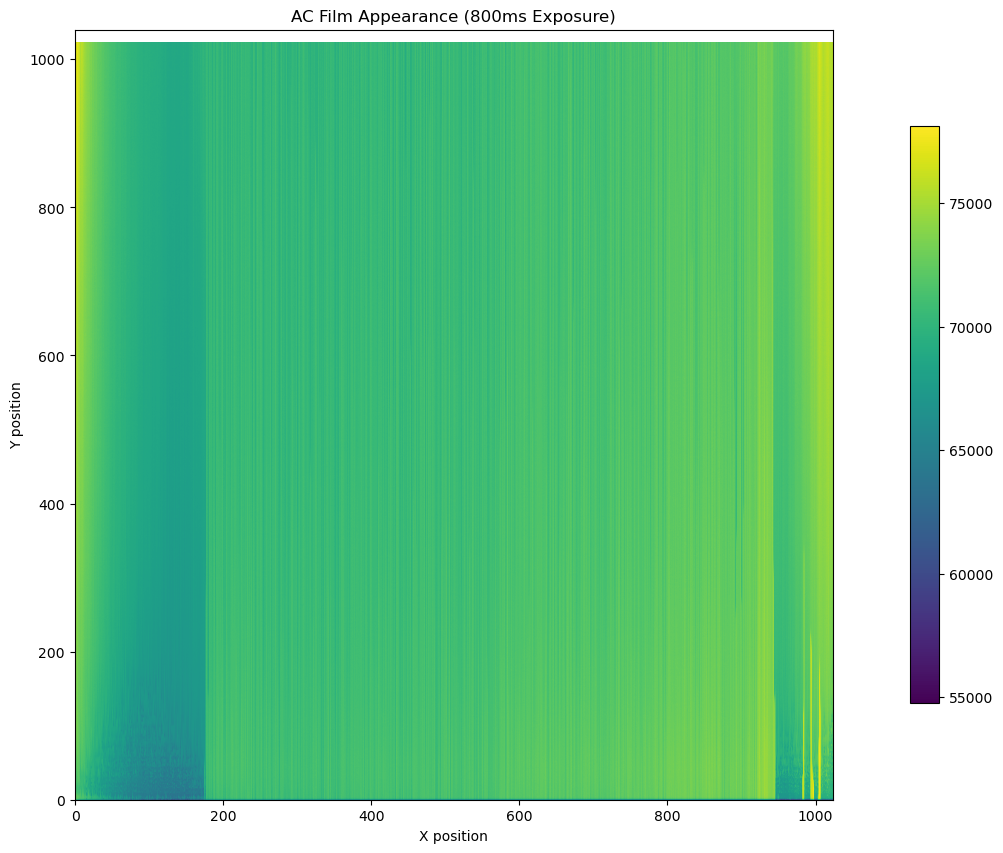

In [5]:
# formatting the density plot with a color map

# setting the max/min values
vmax5 = np.max(count_rate1)
vmin5 = np.min(count_rate1)
# ---------------------------------------------------------------------------
# plotting the transmission data and displaying both variations as one figure
plt.figure(figsize=(20, 10)) # left plot
plt.plot(1, 2, 1)
plt.imshow(count_rate1, vmin=vmin5, vmax=vmax5)
plt.colorbar(shrink=0.75)
plt.ylim(0,1040)
plt.ylabel("Y position")
plt.xlabel("X position")
plt.title("AC Film Appearance (800ms Exposure)")

In [6]:
count_rate1[753][579]

71475.0

In [7]:
#finding the photon rate

power = 2.0E-6 # Watts
wavelength = 9.23E-7 #meters
h = 6.63E-34 #plancks constant J*s
c = 2.99792458E8 #speed of light in m/s


photon_number = (power*wavelength/(h*c))
print(photon_number)


9287470885909.332


In [9]:
gamma_factor = photon_number/np.sum(count_rate1)
print(gamma_factor/9)

13.856349089588909
